<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imporando-Pacotes" data-toc-modified-id="Imporando-Pacotes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imporando Pacotes</a></span></li><li><span><a href="#Função-de-Entrada" data-toc-modified-id="Função-de-Entrada-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Função de Entrada</a></span></li><li><span><a href="#Dicionários" data-toc-modified-id="Dicionários-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dicionários</a></span></li><li><span><a href="#Cenários" data-toc-modified-id="Cenários-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cenários</a></span></li><li><span><a href="#Otimização" data-toc-modified-id="Otimização-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Otimização</a></span></li></ul></div>

# Imporando Pacotes

In [1]:
# Importando as bibliotecas
import numpy as np # pacote para funções matemáticas
import pandas as pd # pacote para a manipulação dos dados em tabela
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt # pacote para fazer gráficos
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


import pandas_ta as ta
import talib
import mplfinance as mpf

import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

pd.set_option("display.max_columns", 40)
pd.set_option('display.max_rows', 500)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from futures_backtester import Backtester

# Função de Entrada

In [3]:
import importlib
name_strategy = 'macd_crossover_trend'  # Nome da função/classe no módulo entries
#name_strategy = 'macd_crossover_anti_trend'  # Nome da função/classe no módulo entries
module = importlib.import_module('entries')
entrada = getattr(module, name_strategy)

# Dicionários

In [4]:
from config.dicts_params import dict_custos, dict_valor_lot, dict_path

# Cenários

In [5]:
# win 5 min


# wdo 5 min
params = {'sl': 24, 'tp': 14, 'signal_period': 6, 'fast_period': 12, 'slow_period': 30}
params = {'sl': 24, 'tp': 12, 'signal_period': 5, 'fast_period': 12, 'slow_period': 18}
params = {'sl': 8, 'tp': 20, 'signal_period': 6, 'fast_period': 12, 'slow_period': 16}

# USDJPY 5 min


In [51]:
params = {'sl': 30, 'tp': 14, 'signal_period': 9, 'fast_period': 5, 'slow_period': 14}

In [56]:
# Configurar o backtester
sym = 'WIN@N'
sym = 'WSP@N'
#sym = 'BIT@N'
#sym = 'WDO@N'
#sym = 'EURJPY'
#sym = 'GBPJPY'
#sym = 'USDJPY'


bt = Backtester(
    symbol = sym,
    timeframe = 't5',
    data_ini = '2019-01-01',
    data_fim = '2025-06-30',
    tp = params['tp'],
    sl = params['sl'],
    slippage = 0,
    tc = dict_custos[sym], # $ per lot
    lote = 1,
    valor_lote= dict_valor_lot[sym],
    initial_cash = 30000,
    path_base= dict_path[sym],
    daytrade = True
)


# Parâmetros da estratégia RSI
signal_period = params['signal_period']
fast_period = params['fast_period']
slow_period = params['slow_period']

# Executa o backtest com a estratégia RSI
results, metrics = bt.run(
    signal_function=entrada, 
    signal_args={
        "signal_period": signal_period,
        "fast_period": fast_period,
        "slow_period": slow_period,
        #'allowed_hours': [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
        'allowed_hours': [9, 10, 11, 12, 13, 14, 15,16,17],
        #'allowed_hours': [14,15],
        'position_type': "long"
    }
)


# Print de métricas
bt.print_metrics(metrics)

RELATÓRIO DE DESEMPENHO
Símbolo: WSP@N
Timeframe: t5
Período: 2019-01-01 a 2025-06-30

--- RESULTADOS ---
Saldo Inicial: $30000.00
Saldo Final: $17244.62
Retorno Total: $-12755.38 (-42.52%)
Retorno Anualizado: -7.43%
Volatilidade Anualizada: 12.07%

--- DRAWDOWN ---
Drawdown Máximo: 45.87%
Drawdown Máximo (Valor): $14422.25
Tempo Máximo em Drawdown: 124044.0 períodos
Tempo em Drawdown: 99.19% do total

--- TRADES ---
Total de Trades: 8118
Trades Vencedores: 4718 (58.12%)
Trades Perdedores: 3400 (41.88%)
Saídas por TP: 41.48%
Saídas por SL: 15.30%
Saídas por Tempo: 43.22%

--- RATIOS ---
Sharpe Ratio: -0.616
Sortino Ratio: -0.804
Calmar Ratio: -0.162
Profit Factor: 0.909

--- ANÁLISE DE GANHOS/PERDAS ---
Ganho Médio: $27.00
Perda Média: $41.22
Win/Loss Ratio: 0.66
Expectancy: $-1.57


<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1400x1000 with 0 Axes>

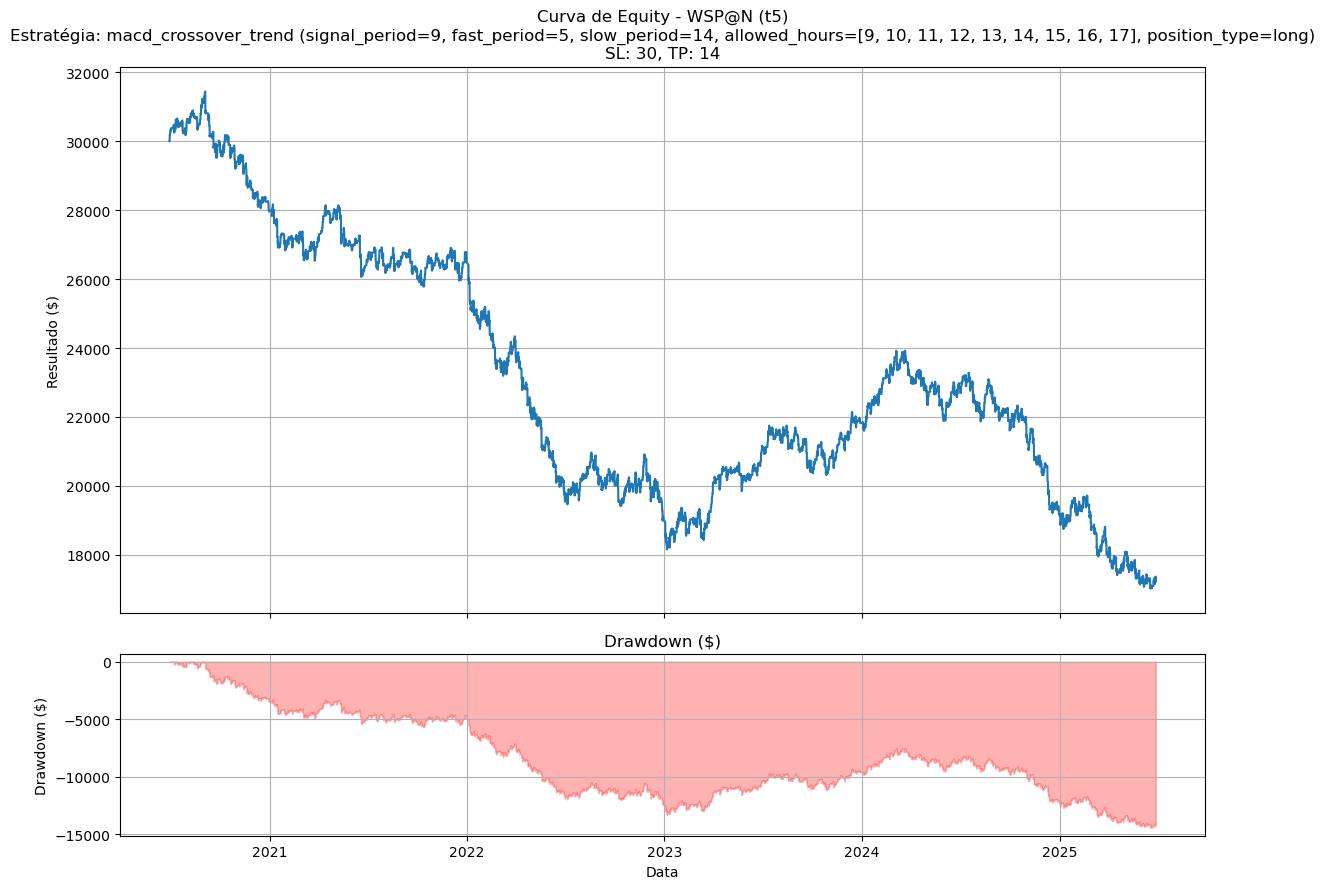

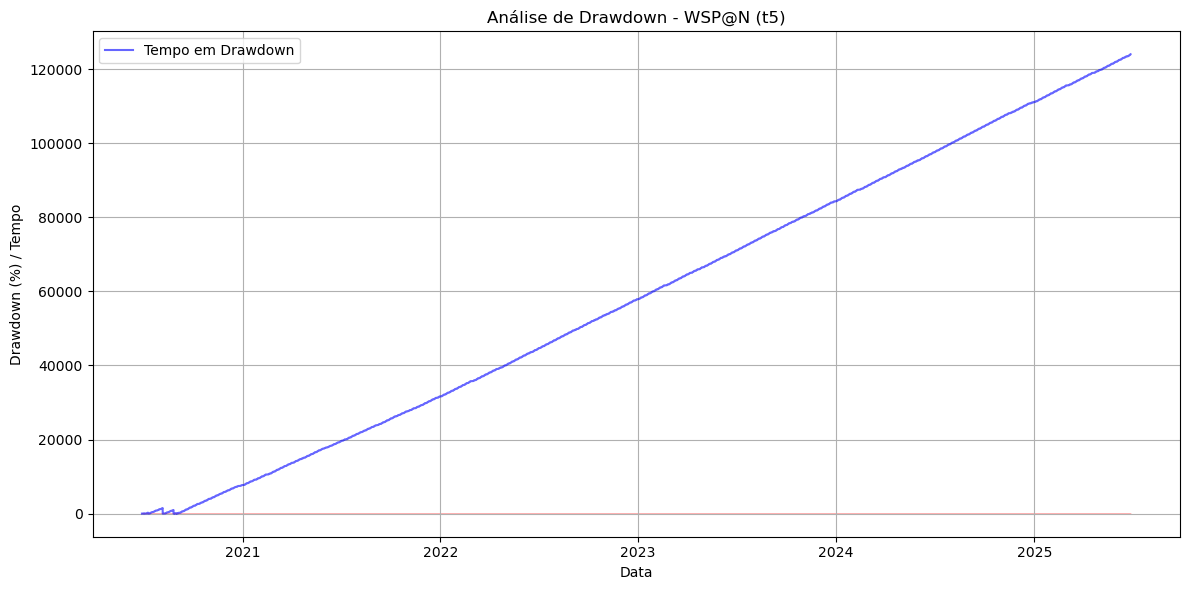

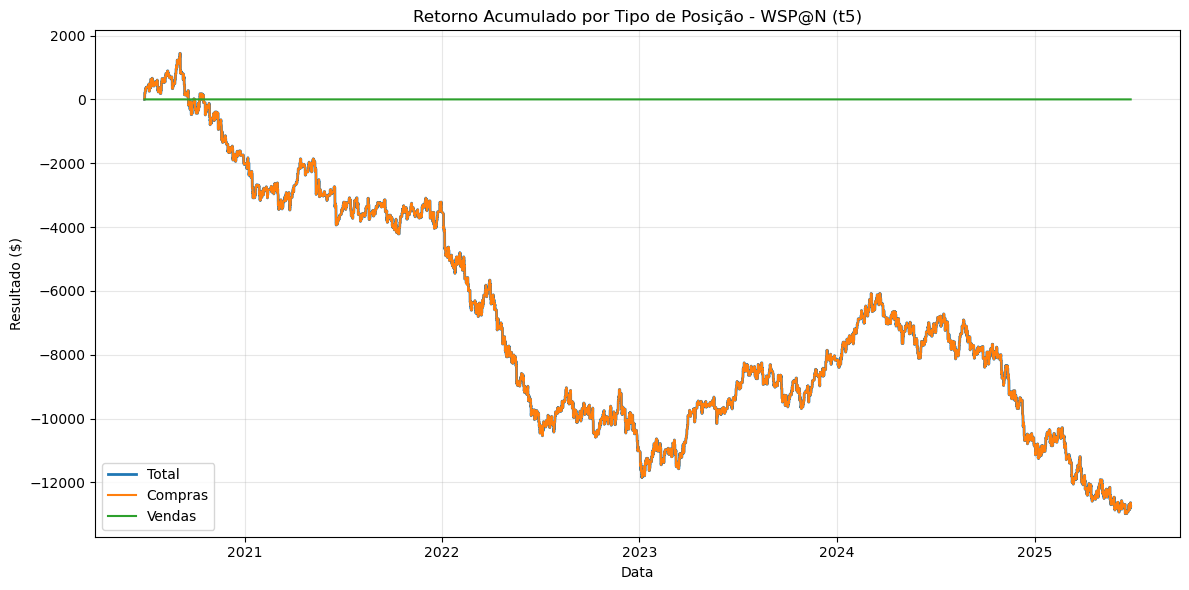

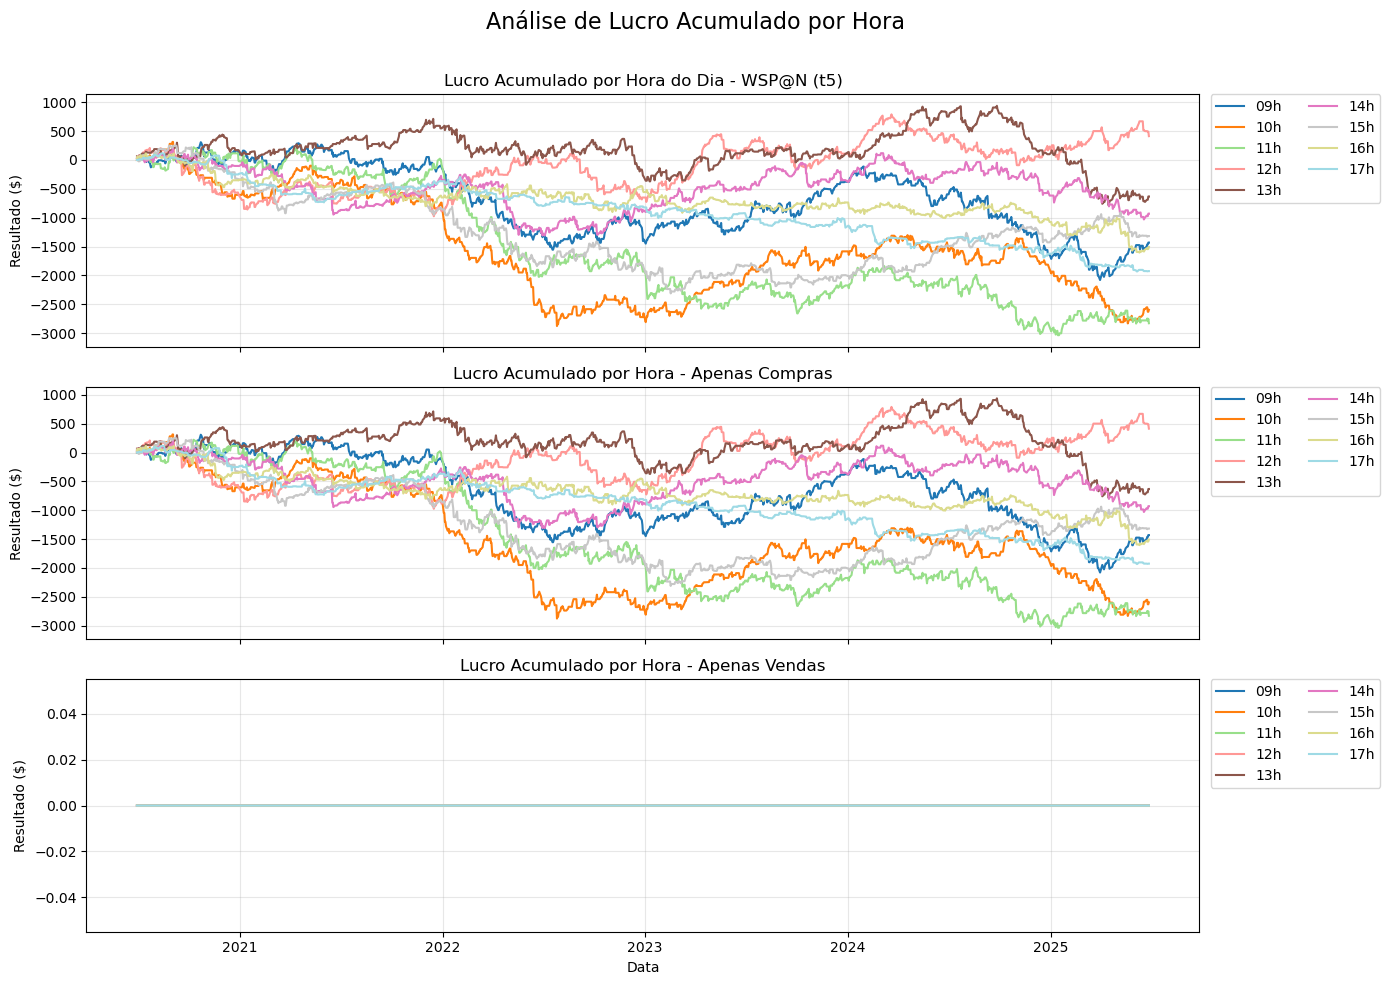

In [57]:
# Plotar a curva de equity com drawdown
plt.figure(figsize=(14, 10))

# 1. Curva de equity
plt = bt.plot_equity_curve(include_drawdown=True)

# 2. Análise detalhada de drawdown
plt = bt.plot_drawdown()

# 3. resultado por hora
bt.plot_by_position()
bt.plot_cumulative_by_hour()

# Otimização

In [9]:
metrics

{'initial_cash': 30000,
 'final_equity': 148663.0,
 'total_return': 118663.0,
 'total_return_pct': 395.54333333333335,
 'annual_return': 31.44768159985931,
 'annual_volatility': 19.604626512650096,
 'total_trades': 4524,
 'win_trades': 1342,
 'loss_trades': 3181,
 'win_rate': 0.29664014146772766,
 'tp_rate': 0.1275419982316534,
 'sl_rate': 0.6821396993810787,
 'time_exit_rate': 0.1903183023872679,
 'profit_factor': 1.3223793417281335,
 'max_drawdown': 0.5930061091215505,
 'max_drawdown_value': 8000.0,
 'max_time_underwater': 14470.0,
 'underwater_rate': 0.9632069316790093,
 'sharpe_ratio': 1.6040949099217656,
 'sortino_ratio': 6.519152395982275,
 'calmar_ratio': 0.5303095721297767,
 'avg_win': 362.70342771982115,
 'avg_loss': 115.71361207167557,
 'win_loss_ratio': 3.13449231448375,
 'expectancy': 26.204086292645513,
 'risk_free_rate': 0.0}

In [30]:
def objective_ind(trial):  
    
    '''
    função para maximizar os ganhos no mini-indice
    '''

    # Configurar o backtester
    sym = 'WIN@N'
    sym = 'WSP@N'
    
    bt = Backtester(
        symbol = sym,
        timeframe = 't5',
        data_ini = '2020-01-01',
        data_fim = '2025-06-30',
        sl = trial.suggest_int('sl', 1.0, 36.0),
        tp = trial.suggest_int('tp', 1.0, 36.0),
        slippage = 0,
        tc = dict_custos[sym], # $ per lot
        lote = 1,
        valor_lote= dict_valor_lot[sym],
        initial_cash = 30000,
        path_base= dict_path[sym],
        daytrade = True
    )
    

    # Parâmetros da estratégia RSI
    signal_period = trial.suggest_int('signal_period', 2, 9)
    fast_period = trial.suggest_int('fast_period', 7, 16)
    slow_period = trial.suggest_int('slow_period', 13, 30)
    
    # Executa o backtest com a estratégia RSI
    _, metrics = bt.run(
        signal_function=entrada, 
        signal_args={
            "signal_period": signal_period,
            "fast_period": fast_period,
            "slow_period": slow_period,
            'allowed_hours': [9, 10, 11, 12, 13, 14, 15, 16, 17],
            'position_type': "long"
        }
    )

    
    metrica = metrics['sharpe_ratio']
    #metrica = metrics['max_drawdown_value']
        
    return metrica

In [31]:
study = optuna.create_study(direction="maximize")

study.optimize(objective_ind, n_trials=220)

[I 2025-06-28 21:45:06,174] A new study created in memory with name: no-name-40aa82ea-a7c6-4459-aeda-21c8243bb7ad
[I 2025-06-28 21:45:06,810] Trial 0 finished with value: -0.6752598535864038 and parameters: {'sl': 29, 'tp': 15, 'signal_period': 7, 'fast_period': 9, 'slow_period': 21}. Best is trial 0 with value: -0.6752598535864038.
[I 2025-06-28 21:45:07,446] Trial 1 finished with value: -0.8285613215795322 and parameters: {'sl': 30, 'tp': 10, 'signal_period': 7, 'fast_period': 9, 'slow_period': 18}. Best is trial 0 with value: -0.6752598535864038.
[I 2025-06-28 21:45:08,087] Trial 2 finished with value: -3.9936541012240463 and parameters: {'sl': 3, 'tp': 5, 'signal_period': 5, 'fast_period': 8, 'slow_period': 13}. Best is trial 0 with value: -0.6752598535864038.
[I 2025-06-28 21:45:08,718] Trial 3 finished with value: -0.2274065670192196 and parameters: {'sl': 25, 'tp': 30, 'signal_period': 7, 'fast_period': 10, 'slow_period': 22}. Best is trial 3 with value: -0.2274065670192196.
[I 

KeyError: 'MACD_15_13_3'

In [211]:
study.best_params

{'sl': 8, 'tp': 20, 'signal_period': 6, 'fast_period': 12, 'slow_period': 16}

In [102]:
plot_param_importances(study)